# Node Classification using Support Vectors
## Imports

In [1]:
import numpy as np
import cvxpy as cp
import networkx as nx
import scipy
import matplotlib.pyplot as plt

np.random.seed(2)

### Visualize Zachary Karate Club Network

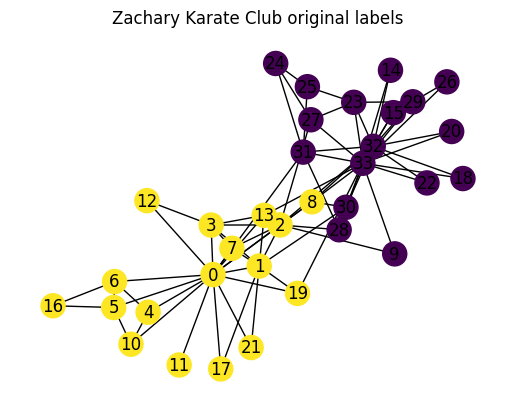

In [2]:
labels = [
    1,1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
]

G = nx.karate_club_graph()
graph_layout = nx.spring_layout(G)

plt.title('Zachary Karate Club original labels')
nx.draw(
    G,
    node_color=labels, 
    with_labels=True,
    pos=graph_layout
)

In this example, we will use nodes 0 and 33, the main nodes in the network to classify the other ones.

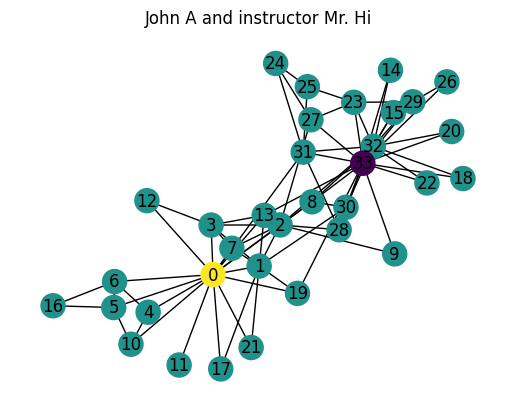

In [3]:
pred_labels = labels.copy()
for i in range(1, 33):
    pred_labels[i] = 0

plt.title('John A and instructor Mr. Hi')

nx.draw(
    G,
    node_color=pred_labels, 
    with_labels=True,
    pos=graph_layout
)

In [48]:
train_samples = [0, 33]
node_label_dict = {i: labels[i] for i in train_samples}

## Support Vector Classifier

Instantiate the Classifier and get predictions

In [52]:
from svc import SVC

classifier = SVC(5)
classifier.fit(G, node_label_dict)
y_pred = classifier.predict()

In [53]:
y_pred

array([ 1.        ,  0.58926537,  0.30136625,  0.55592399,  0.65368197,
        0.85628802,  0.82183096,  0.44520657, -0.19798519, -0.16432876,
        0.66619135,  0.37020647,  0.33320999,  0.31522313, -0.37097715,
       -0.45545847,  0.58158267,  0.32361072, -0.29347832,  0.22296805,
       -0.32129544,  0.34275548, -0.38256895, -0.71483097, -0.31767078,
       -0.4750854 , -0.44695513, -0.44795061, -0.17661502, -0.6392491 ,
       -0.28383079, -0.49100911, -0.93275235, -1.        ])

### Visualize diffusion outputs
The nodes receive values $\in [-1,1]$

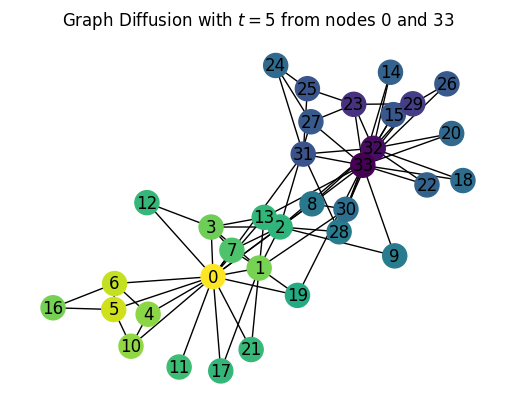

In [54]:
plt.title('Graph Diffusion with $t=5$ from nodes 0 and 33')

nx.draw(
    G,
    node_color=y_pred,
    with_labels=True,
    pos=graph_layout
)

### Node Classification

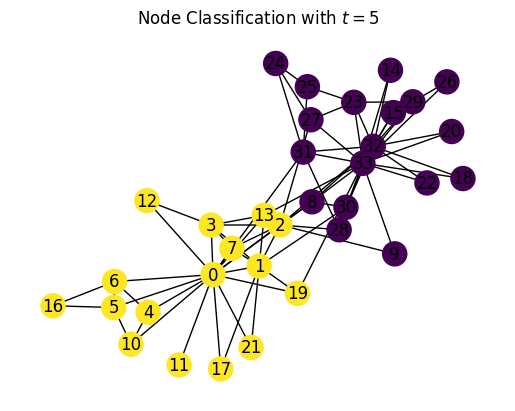

In [55]:
plt.title('Node Classification with $t=5$')

nx.draw(
    G,
    node_color=np.sign(y_pred), 
    with_labels=True,
    pos=graph_layout
)

### Classification Accuracy
Here, we plot $y_{\text{real}}-\hat{y}$ on the nodes. It is possible to see that only one node is missclassified

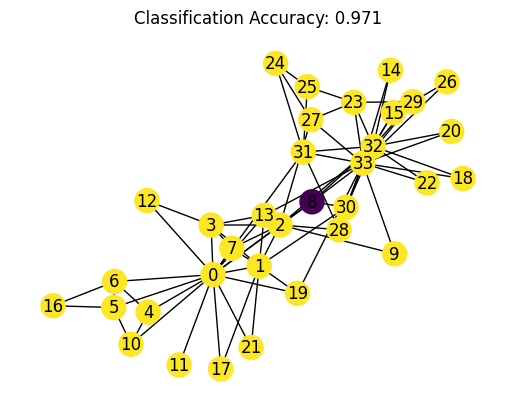

In [56]:
error = classifier.score(labels)

plt.title(f'Classification Accuracy: {error:.3f}')

nx.draw(
    G,
    node_color=np.sign(y_pred) - labels, 
    with_labels=True,
    pos=graph_layout
)

### Accuracy as a function of time

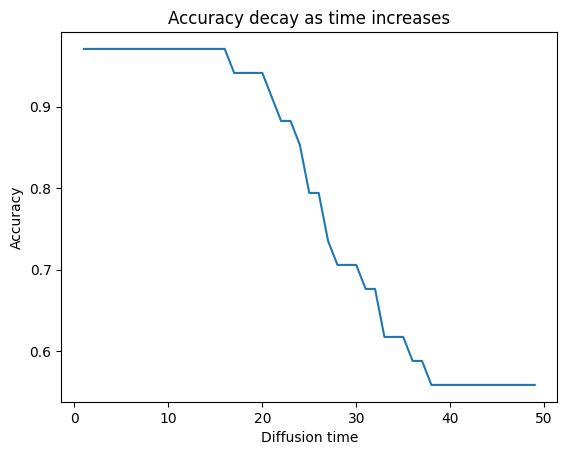

In [57]:
score_list = []
for i in range(1, 50):
    classifier = SVC(i)
    classifier.fit(G, node_label_dict)
    y_pred = classifier.predict()
    score_list.append(classifier.score(labels))

plt.title('Accuracy decay as time increases')
plt.ylabel('Accuracy')
plt.xlabel('Diffusion time')
plt.plot(range(1, 50), score_list)

We can see that node 0 takes over with high values of $t$

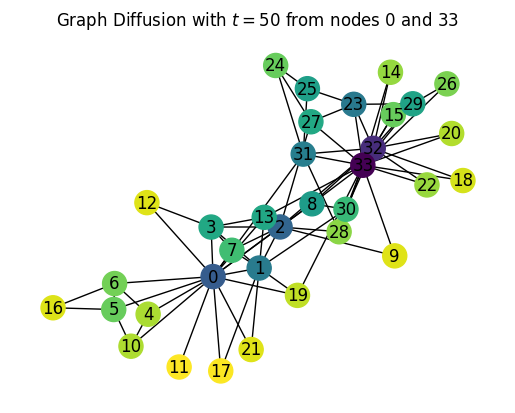

In [58]:
classifier = SVC(50)
classifier.fit(G, node_label_dict)
y_pred = classifier.predict()

plt.title('Graph Diffusion with $t=50$ from nodes 0 and 33')

nx.draw(
    G,
    node_color=y_pred,
    with_labels=True,
    pos=graph_layout
)